Эркенова Джамиля, 15.11Д-ПМ03/19б

# Распознавание рукописных цифр MNIST («Modified National Institute of Standards and Technology») сверточной нейронной сетью

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

(x_train, y_train), (x_test, y_test) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


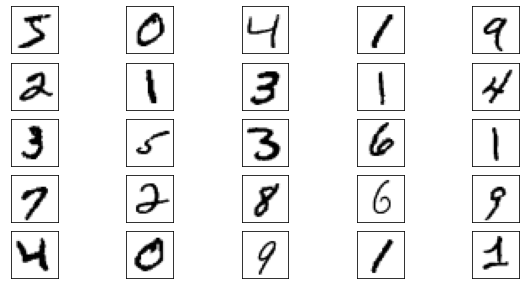

In [3]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()



Создадим сверточную нейронную сеть с тремя слоями свертки, функцией активации ReLU и одним полносвязным слоем

In [4]:
# сверточная нейронная сеть
model = keras.Sequential([
                          Conv2D(32, (3,3), padding = 'same', input_shape=(28, 28, 1), activation = 'relu'),
                          MaxPooling2D((2, 2)),
                          Conv2D(32, (3,3), activation = 'relu'),
                          MaxPooling2D((2, 2)),
                          Conv2D(32, (3,3), activation = 'relu'),
                          MaxPooling2D((2, 2)),
                          Flatten(),
                          Dense(128, activation = 'relu'),
                          Dropout(0.5),
                          Dense(10, activation= 'softmax')

])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [5]:
# Компилируем и обучаем модель
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=2, verbose = 1)
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping_callback])
print("Обучение остановлено на эпохе", early_stopping_callback.stopped_epoch)

Epoch 1/15
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3197 - accuracy: 0.8978 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 2/15
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0977 - accuracy: 0.9708 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 3/15
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0709 - accuracy: 0.9782 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 4/15
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0487 - val_accuracy: 0.9859
Epoch 5/15
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0414 - val_accuracy: 0.9883
Epoch 6/15
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0465 - val_accuracy: 0.9869
Epoch 7/15
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0454 -

In [6]:
# проверка обучения на тестовом наборе
model.evaluate(x_test, y_test_cat)

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)


313/313 [==============================] - 3s 8ms/step - loss: 0.0301 - accuracy: 0.9902


[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1133    0    2    0    0    0    0    0    0]
 [   1    2 1022    0    3    0    0    4    0    0]
 [   0    0    0 1007    0    1    0    2    0    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   2    1    0    9    0  875    1    0    0    4]
 [   3    2    0    0    3    2  947    0    1    0]
 [   0   11    9    0    0    0    0 1006    0    2]
 [   2    0    2    0    0    0    1    2  966    1]
 [   2    1    0    2    7    0    0    5    2  990]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98   

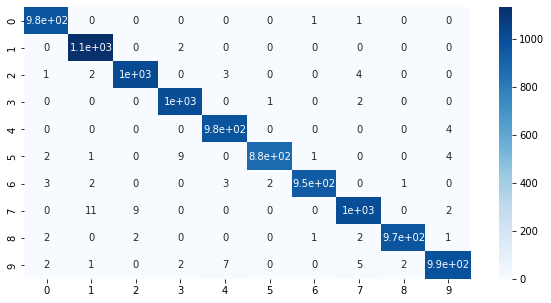

In [7]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# Выведем отчет о классификации и построим матрицу ошибок
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot = True, cmap= "Blues")

print(classification_report(y_test, pred))

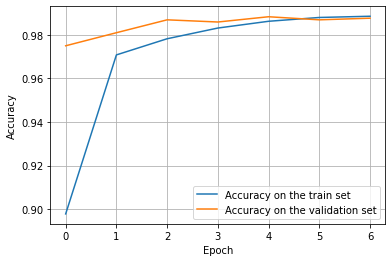

In [8]:
plt.plot(his.history['accuracy'], label='Accuracy on the train set')
plt.plot(his.history['val_accuracy'], label='Accuracy on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

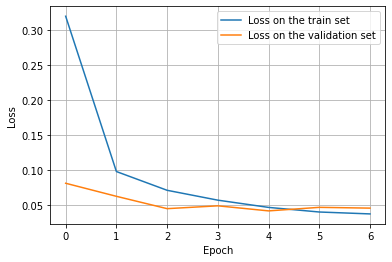

In [9]:
plt.plot(his.history['loss'], label='Loss on the train set')
plt.plot(his.history['val_loss'], label='Loss on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

[[2.21842437e-18 6.67792983e-14 1.33901145e-14 1.00000000e+00
  1.97114183e-20 4.80420752e-08 4.48029293e-20 8.38599074e-14
  5.24280515e-11 3.15885477e-11]]
Распознанная цифра:  3


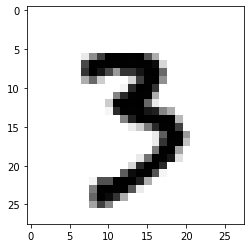

In [10]:
# проверка распознавания цифр
n = 30
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( "Распознанная цифра: ", np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [11]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:25])
print(y_test[:25])



(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [12]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:20])

x_false = x_test[~mask]
y_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)



[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
(98, 28, 28)


Значение сети: 7


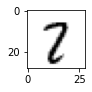

Значение сети: 2


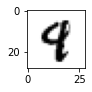

Значение сети: 1


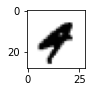

Значение сети: 0


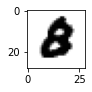

Значение сети: 4


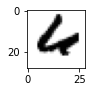

In [13]:
# Вывод первые 5 неверных результатов
#plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    print("Значение сети: "+str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [14]:
# Сохраним сеть
from tensorflow.python.keras.models import Model, model_from_json
print("Сохраняем сеть")
model_json = model.to_json()
json_file = open("MNIST_CNN.json","w")
json_file.write(model_json)
json_file.close()
model.save_weights("MNIST_CNN.h5")
print("Сохранение сети завершено")

Сохраняем сеть
Сохранение сети завершено


In [15]:
# Загружаем данные об архитектуре сети из файла json
json_file = open("MNIST_CNN.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("MNIST_CNN.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [16]:
# Номера сверточных слоев - 0, 2, 4
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[4].output)
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          9248      
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________

In [17]:
#Запускаем изображение в обрезанную модель
n = 30
x = np.expand_dims(x_test[n], axis=0)

activation = activation_model.predict(x)
print(activation.shape)

(1, 4, 4, 32)


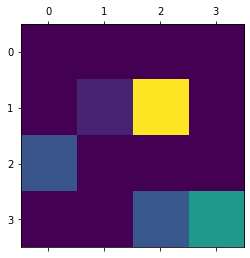

In [18]:
#Показываем результаты работы модели
plt.matshow(activation[0, :, :,1], cmap='viridis')

In [19]:
#Печатаем вывод всех карт признаков
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [20]:
display_grid = np.zeros((n_cols * size, images_per_row * size))
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


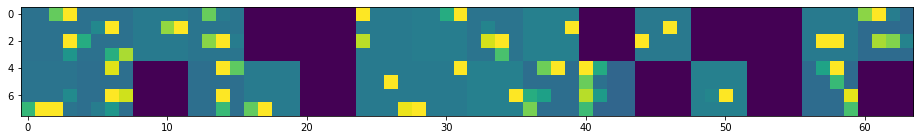

In [21]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

Изменим некоторые параметры модели

In [24]:
# сверточная нейронная сеть
model = keras.Sequential([
                          Conv2D(32, (3,3), padding = 'same', input_shape=(28, 28, 1), activation = 'relu'),
                          MaxPooling2D((2, 2)),
                          Conv2D(32, (3,3), activation = 'selu'),
                          MaxPooling2D((2, 2)),
                          Conv2D(32, (3,3), activation = 'selu'),
                          MaxPooling2D((2, 2)),
                          Flatten(),
                          Dense(128, activation = 'selu'),
                          Dropout(0.2),
                          Dense(10, activation= 'softmax')

])

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 32)        

In [25]:
# Компилируем и обучаем модель
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3, verbose = 1)
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=15, validation_split=0.2, callbacks=[early_stopping_callback])
print("Обучение остановлено на эпохе", early_stopping_callback.stopped_epoch)

Epoch 1/15
1500/1500 [==============================] - 49s 32ms/step - loss: 0.4994 - accuracy: 0.8506 - val_loss: 0.1449 - val_accuracy: 0.9569
Epoch 2/15
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1487 - accuracy: 0.9545 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 3/15
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1087 - accuracy: 0.9666 - val_loss: 0.0884 - val_accuracy: 0.9743
Epoch 4/15
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.0828 - val_accuracy: 0.9755
Epoch 5/15
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0768 - accuracy: 0.9761 - val_loss: 0.0729 - val_accuracy: 0.9772
Epoch 6/15
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0672 - accuracy: 0.9797 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 7/15
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0617 -

In [26]:
# проверка обучения на тестовом наборе
model.evaluate(x_test, y_test_cat)

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)


313/313 [==============================] - 3s 8ms/step - loss: 0.0333 - accuracy: 0.9892


[[ 971    0    2    0    0    0    4    1    2    0]
 [   0 1130    1    1    0    1    1    1    0    0]
 [   2    1 1025    0    0    0    1    2    1    0]
 [   0    0    1 1007    0    0    0    0    2    0]
 [   1    0    1    0  970    0    2    2    1    5]
 [   2    0    0   13    0  871    3    1    0    2]
 [   4    1    0    1    1    2  948    0    1    0]
 [   0    2    5    1    1    0    0 1015    1    3]
 [   2    0    3    2    0    0    1    1  964    1]
 [   3    0    0    4    3    3    0    1    4  991]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99   

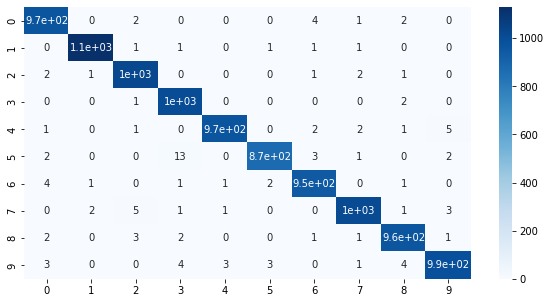

In [27]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# Выведем отчет о классификации и построим матрицу ошибок
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot = True, cmap= "Blues")

print(classification_report(y_test, pred))

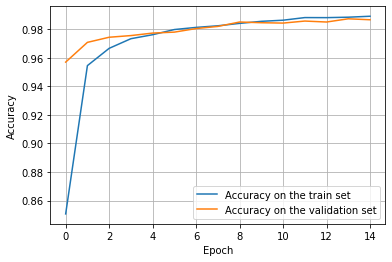

In [28]:
plt.plot(his.history['accuracy'], label='Accuracy on the train set')
plt.plot(his.history['val_accuracy'], label='Accuracy on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

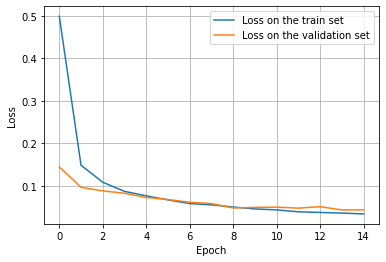

In [29]:
plt.plot(his.history['loss'], label='Loss on the train set')
plt.plot(his.history['val_loss'], label='Loss on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

[[3.13473796e-11 6.57792210e-10 3.50349055e-10 9.99999762e-01
  1.19670853e-11 2.82171271e-07 1.11794586e-13 2.60010058e-09
  9.26403287e-10 1.91369853e-08]]
Распознанная цифра:  3


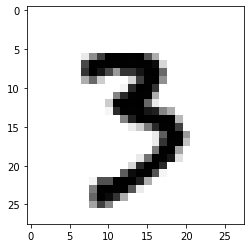

In [30]:
# проверка распознавания цифр
n = 30
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( "Распознанная цифра: ", np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [31]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:25])
print(y_test[:25])



(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [32]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:20])

x_false = x_test[~mask]
y_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)



[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
(108, 28, 28)


Значение сети: 7


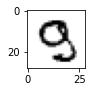

Значение сети: 2


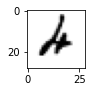

Значение сети: 1


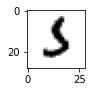

Значение сети: 0


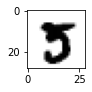

Значение сети: 4


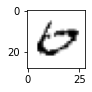

In [33]:
# Вывод первые 5 неверных результатов
#plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    print("Значение сети: "+str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [34]:
# Сохраним сеть
from tensorflow.python.keras.models import Model, model_from_json
print("Сохраняем сеть")
model_json = model.to_json()
json_file = open("MNIST_CNN.json","w")
json_file.write(model_json)
json_file.close()
model.save_weights("MNIST_CNN.h5")
print("Сохранение сети завершено")

Сохраняем сеть
Сохранение сети завершено


In [35]:
# Загружаем данные об архитектуре сети из файла json
json_file = open("MNIST_CNN.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("MNIST_CNN.h5")
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [36]:
# Номера сверточных слоев - 0, 2, 4
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[4].output)
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          9248      
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_______________________________________________________

In [37]:
#Запускаем изображение в обрезанную модель
n = 30
x = np.expand_dims(x_test[n], axis=0)

activation = activation_model.predict(x)
print(activation.shape)

(1, 4, 4, 32)


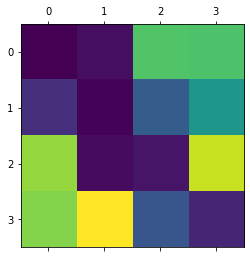

In [38]:
#Показываем результаты работы модели
plt.matshow(activation[0, :, :,1], cmap='viridis')

In [39]:
#Печатаем вывод всех карт признаков
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [40]:
display_grid = np.zeros((n_cols * size, images_per_row * size))
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

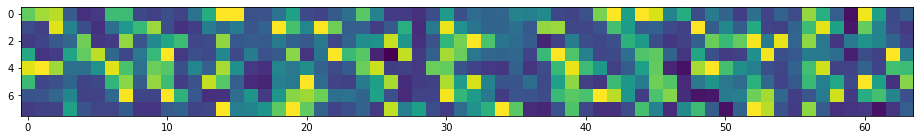

In [41]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')